In [48]:
%load_ext autoreload
%autoreload 2
from yahpo_train.cont_normalization import ContNormalization
from yahpo_train.model  import *
from yahpo_gym import cfg
from yahpo_gym.benchmarks import lcbench

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
cfg = cfg("lcbench")
dls = dl_from_config(cfg)

In [65]:
f = FFSurrogateModel(dls, layers=[512,512], deeper = [], ps = [0., 0.])

In [66]:
l = SurrogateTabularLearner(dls, ff, loss_func=nn.MSELoss(reduction='mean'), metrics=nn.MSELoss)
l.metrics = AvgTfedMetric(mean_absolute_error)

/home/flo/miniconda3/envs/yahpo/lib/python3.9/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=2.558585947554093e-06)

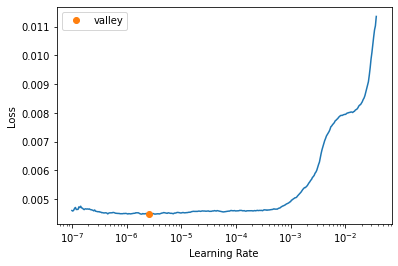

In [67]:
l.lr_find(num_it=500)

In [68]:
l.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,None,time
0,0.004593,0.003329,0.003329,02:00


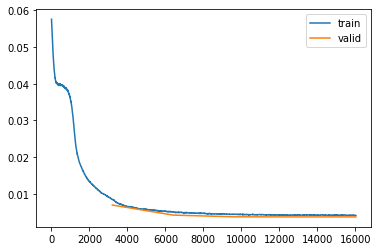

In [ ]:
l.recorder.plot_loss()